In [2]:
import csv
import pandas as pd

input_file = "../data/raw/listings_detailed.csv"
output_file = "../data/processed/listings_fixed.csv"

rows = []

# Step 1: Read raw CSV safely
with open(input_file, "r", encoding="utf-8", errors="replace") as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

# Step 2: Detect the correct number of columns (based on header)
expected_cols = len(rows[0])
print(f"Expected columns: {expected_cols}")

# Step 3: Fix rows with wrong number of columns
fixed_rows = []
for i, row in enumerate(rows):
    if len(row) != expected_cols:
        print(f"Fixing row {i+1}: had {len(row)} columns")
        if len(row) < expected_cols:
            # Pad missing columns
            row += [""] * (expected_cols - len(row))
        else:
            # Merge extra columns into the last one
            row = row[:expected_cols-1] + [",".join(row[expected_cols-1:])]
    fixed_rows.append(row)

# Step 4: Save fixed CSV
with open(output_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(fixed_rows)

# Step 5: Load into pandas
data = pd.read_csv(output_file)
print("DataFrame shape:", data.shape)


Expected columns: 75
DataFrame shape: (42931, 75)


C:\Users\USER\AppData\Local\Temp\ipykernel_14660\1952502628.py:38: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [3]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11


In [5]:
data.isna().sum().reset_index()

,index,0
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,source,0
...,...,...
70,calculated_host_listings_count,0
71,calculated_host_listings_count_entire_homes,0
72,calculated_host_listings_count_private_rooms,0
73,calculated_host_listings_count_shared_rooms,0


In [6]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
data.isna().sum().to_csv("../data/processed/missing_summary.csv")

In [7]:
data.price
data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_14660\4287303707.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)


In [8]:
data.price

0          143.0
1           30.0
2          157.0
3           89.0
4          125.0
5           63.0
6           82.0
7          118.0
8           49.0
9          115.0
10         975.0
11         179.0
12         172.0
13          68.0
14         100.0
15         380.0
16         175.0
17          60.0
18         301.0
19         109.0
20          41.0
21         105.0
22          40.0
23          80.0
24          90.0
25          60.0
26          85.0
27          99.0
28         216.0
29         150.0
30         280.0
31         143.0
32         156.0
33         152.0
34         128.0
35          55.0
36         225.0
37          50.0
38          70.0
39          45.0
40         188.0
41          28.0
42          46.0
43         175.0
44          56.0
45          55.0
46         101.0
47         215.0
48         289.0
49         380.0
50          50.0
51          99.0
52         199.0
53         151.0
54          35.0
55          26.0
56         109.0
57         133.0
58          89

In [9]:
Q1 = data["price"].quantile(0.25)   
Q3 = data["price"].quantile(0.75)   
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["price"] < lower_bound) | (data["price"] > upper_bound)]
print("Outliers found:", len(outliers))



Outliers found: 3293


In [10]:
import numpy as np

data["price_capped"] = data["price"].clip(lower=lower_bound, upper=upper_bound)

import numpy as np
data["price_log"] = np.log1p(data["price_capped"])

In [11]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_capped,price_log
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,1.0,1.0,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,143.0,4.969813
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,2.0,5.0,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29,30.0,3.433987
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,1.0,1.0,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,157.0,5.062595
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,https://www.airbnb.com/users/show/47569

In [12]:
drop_cols = ['id','listing_url','scrape_id','name','description',
             'picture_url','license',
             'host_url','host_thumbnail_url','host_picture_url']

data = data.drop(columns=drop_cols, errors='ignore')

In [13]:
data.shape

(42931, 67)

In [14]:
for col in ['host_response_rate','host_acceptance_rate']:
    data[col] = data[col].replace('%','', regex=True).replace('Unknown', 0).astype(float)


In [15]:
num_cols = data.select_dtypes(include=['float64','int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


In [16]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


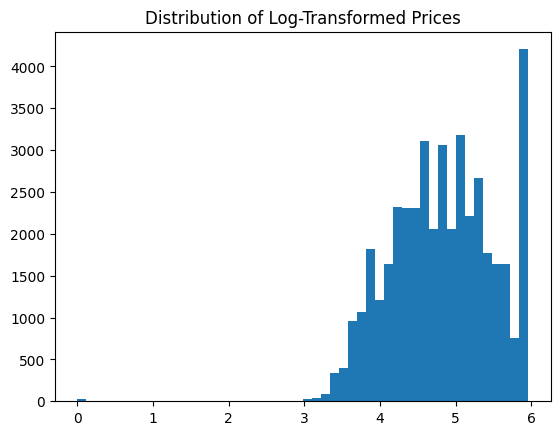

In [17]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()


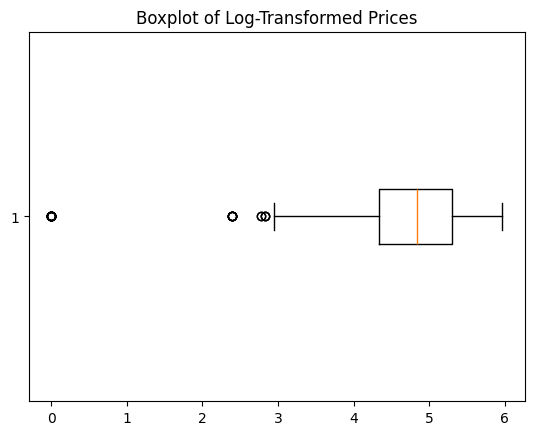

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(data["price_log"], vert=False)
plt.title("Boxplot of Log-Transformed Prices")
plt.show()


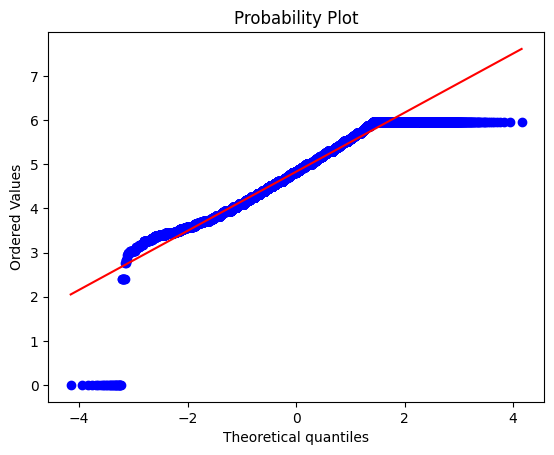

In [19]:
import scipy.stats as stats
stats.probplot(data["price_log"], dist="norm", plot=plt)
plt.show()


In [20]:
# Percentile-based winsorization
lower_cap = data["price"].quantile(0.01)
upper_cap = data["price"].quantile(0.99)

data["price_capped"] = data["price"].clip(lower=lower_cap, upper=upper_cap)
data["price_log"] = np.log1p(data["price_capped"])


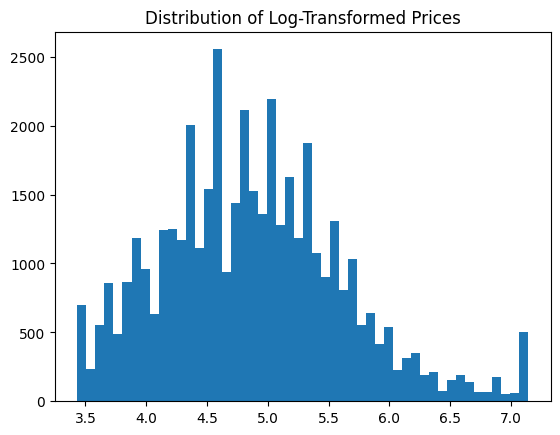

In [21]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()

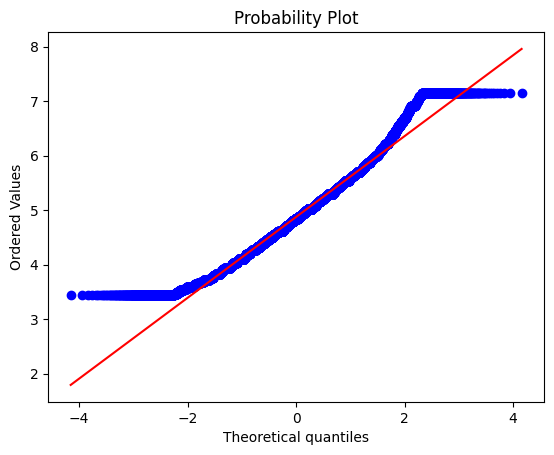

In [22]:
import scipy.stats as stats
stats.probplot(data["price_log"], dist="norm", plot=plt)
plt.show()

<Axes: xlabel='price_log', ylabel='Count'>

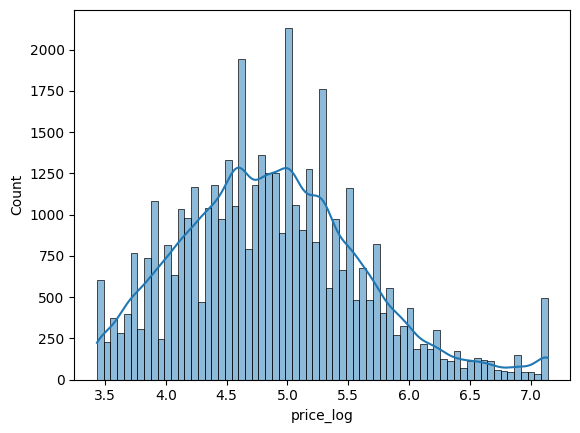

In [23]:
import seaborn as sns
sns.histplot(data["price_log"], kde=True)


In [24]:
data.head()

,last_scraped,source,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_capped,price_log
0,2023-03-06,city scrape,Unknown,495455523,Michael,2023-01-10,Unknown,Unknown,Unknown,100.0,96.0,f,Canarsie,1.0,1.0,"['email', 'phone']",t,f,Unknown,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,Unknown,Unknown,4.83,4.89,4.80,4.95,4.96,4.85,4.77,f,1,0,1,0,0.52,143.0,4.969813
1,2023-03-06,city scrape,Unknown,488760226,Eric,2022-11-22,Unknown,Unknown,within an hour,100.0,100.0,f,Canarsie,2.0,5.0,"['email', 'phone']",t,t,Unknown,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,2,1,1,0,4.29,30.0,3.433987
2,2023-03-06,city scrape,Unknown,461263600,Tommaso,2022-05-27,Unknown,Unknown,Unknown,100.0,96.0,f,Tottenville,1.0,1.0,"['email', 'phone']",f,f,Unknown,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,Unknown,Unknown,4.83,4.89,4.80,4.95,4.96,4.85,4.77,f,1,1,0,0,0.52,157.0,5.062595
3,2023-03-06,city scrape,Unknown,475699129,Suliman,2022-08-18,Unknown,Unknown,within an hour,99.0,98.0,t,Brighton Beach,7.0,7.0,"['email', 'phone']",t,t,Unknown,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,NaN,2 baths,3.0,1.0,"[""Security cameras on property"", ""Keypad"", ""Ca...",89.0,1,20,1.0,1.0,20.0,20.0,1.0,20.0,NaN,t,30,60,90,364,2023-03-06,15,15,4,2022-12-10,2023-02-07,5.00,5.00,4.87,5.00,5.00,5.00,5.00,t,7,0,7,0,5.17,89.0,4.499810
4,2023-03-06,city scrape,You will find within walking distance the Metr...,397288055,Katherine,2021-04-16,Unknown,Unknown,within an hour,75.0,68.0,f,North Riverdale,1.0,2.0,['phone'],t,t,"The Bronx, New York, United States",North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,NaN,t,3,17,46,46,2023-03-06,25,16,0,2021-04-30,2022-11-13,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1,1,0,0,1.11,125.0,4.836282


In [26]:
data.to_csv(r"C:\Users\USER\Desktop\FDM-MiniProject\Air_bnb_Price_prediction\data\processed\new.csv", index=False)


In [27]:
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['host_days'] = (pd.to_datetime("today") - data['host_since']).dt.days.fillna(0)

data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['days_since_last_review'] = (pd.to_datetime("today") - data['last_review']).dt.days.fillna(9999)


C:\Users\USER\AppData\Local\Temp\ipykernel_14660\4293312149.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')


In [44]:
data.to_csv(r"C:\Users\USER\Desktop\FDM-MiniProject\Air_bnb_Price_prediction\data\processed\new.csv", index=False)


In [29]:
data.host_acceptance_rate

0         96.0
1        100.0
2         96.0
3         98.0
4         68.0
5         99.0
6         96.0
7         50.0
8         63.0
9         29.0
10       100.0
11       100.0
12       100.0
13       100.0
14        96.0
15       100.0
16       100.0
17       100.0
18        96.0
19        58.0
20         0.0
21       100.0
22        50.0
23        89.0
24        85.0
25        86.0
26       100.0
27       100.0
28        99.0
29        96.0
30        96.0
31       100.0
32        96.0
33        96.0
34        99.0
35        96.0
36        89.0
37        64.0
38       100.0
39       100.0
40        96.0
41        88.0
42        67.0
43       100.0
44        97.0
45       100.0
46        50.0
47       100.0
48        96.0
49        92.0
50        92.0
51        96.0
52        94.0
53       100.0
54         9.0
55         9.0
56        96.0
57        57.0
58       100.0
59        93.0
60        96.0
61        93.0
62        90.0
63        96.0
64        98.0
65        94.0
66       1

In [32]:
import pandas as pd

# Example: assuming your dataframe is df and has a column "amenities"
# Step 1: Handle missing values
data['amenities'] = data['amenities'].fillna("")

# Step 2: Count total number of amenities
data['amenities_count'] = data['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Step 3: Find most frequent amenities (you can change top_n)
top_n = 15  # choose how many you want
all_amenities = data['amenities'].str.split(',').explode().str.strip()
top_amenities = all_amenities.value_counts().head(top_n).index

# Step 4: Create binary columns for top amenities (safe version)
for a in top_amenities:
    col_name = 'has_' + a.replace(" ", "_").replace("-", "_").replace("/", "_").lower()
    data[col_name] = data['amenities'].str.contains(a, case=False, regex=False).fillna(False).astype(int)

# ✅ Done! Now you have both:
# - data['amenities_count'] (total number of amenities)
# - Columns like data['has_wifi'], data['has_pool'], etc.


In [33]:
data.columns

Index(['last_scraped', 'source', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_la

In [39]:
data.head(2)

,neighborhood_overview,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_capped,price_log,host_days,days_since_last_review,amenities_count,"has_""wifi""","has_""smoke_alarm""","has_""kitchen""","has_""carbon_monoxide_alarm""","has_[""hangers""","has_""essentials""","has_""heating""","has_""hair_dryer""","has_""shampoo""","has_""dishes_and_silverware""","has_""refrigerator""","has_""cooking_basics""","has_""air_conditioning""","has_""iron""","has_""bed_linens"""
0,Unknown,2023-01-10,Unknown,Unknown,100.0,96.0,f,Canarsie,1.0,1.0,"['email', 'phone']",t,f,Unknown,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,Unknown,NaT,4.83,4.89,4.80,4.95,4.96,4.85,4.77,f,1,0,1,0,0.52,143.0,4.969813,996.0,9999.0,25,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1
1,Unknown,2022-11-22,Unknown,within an hour,100.0,100.0,f,Canarsie,2.0,5.0,"['email', 'phone']",t,t,Unknown,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,30.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,2,1,1,0,4.29,30.0,3.433987,1045.0,956.0,7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
data = data.drop(columns=['amenities'])

In [36]:
data= data.drop(columns=['last_scraped', 'source','host_id'])

In [38]:
data = data.drop(columns=['host_name', 'host_about'])

In [45]:
num_columns = data.shape[1]
print("Number of columns:", num_columns)

Number of columns: 78


In [41]:
data.calendar_last_scraped

0        2023-03-06
1        2023-03-06
2        2023-03-06
3        2023-03-06
4        2023-03-06
5        2023-03-06
6        2023-03-06
7        2023-03-06
8        2023-03-06
9        2023-03-06
10       2023-03-06
11       2023-03-06
12       2023-03-06
13       2023-03-06
14       2023-03-06
15       2023-03-06
16       2023-03-06
17       2023-03-06
18       2023-03-06
19       2023-03-06
20       2023-03-06
21       2023-03-06
22       2023-03-06
23       2023-03-06
24       2023-03-06
25       2023-03-06
26       2023-03-06
27       2023-03-06
28       2023-03-06
29       2023-03-06
30       2023-03-06
31       2023-03-06
32       2023-03-06
33       2023-03-06
34       2023-03-06
35       2023-03-06
36       2023-03-06
37       2023-03-06
38       2023-03-06
39       2023-03-06
40       2023-03-06
41       2023-03-06
42       2023-03-06
43       2023-03-06
44       2023-03-06
45       2023-03-06
46       2023-03-06
47       2023-03-06
48       2023-03-06
49       2023-03-06


In [42]:
data = data.drop(columns=['calendar_last_scraped'])

In [46]:
data.isna().sum()

neighborhood_overview                               0
host_since                                          5
host_location                                       0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_neighbourhood                                  0
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood                                       0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type               

In [47]:
data = data.drop(columns=['bathrooms'])

In [53]:
m = data.isna().sum()

for col, missing in m.items():
    if missing > 0:
        print(f"{col}: {missing}")


In [51]:
data = data.drop(columns=['calendar_updated', 'last_review'])

In [52]:
data = data.dropna(subset=['host_since'])


In [ ]:
data = data.drop(columns = ['price_'])

In [56]:
# List of columns to drop

drop_cols = [
    # Price-related (keep only price_log)
    'price',
    'price_capped',

    # Review dates (keep engineered features like days_since_last_review)
    'first_review',
    'last_review',

    # Free-text columns (unless doing NLP)
    'name',
    'summary',
    'description',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules'
]

# Drop them if they exist in the dataset
data = data.drop(columns=[c for c in drop_cols if c in data.columns], errors="ignore")

print("Remaining columns:", len(data.columns))
print("Dropped:", [c for c in drop_cols if c not in data.columns])


Remaining columns: 71
Dropped: ['price', 'price_capped', 'first_review', 'last_review', 'name', 'summary', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules']


In [61]:
# Outlier handling for minimum_nights and maximum_nights

# Cap minimum_nights at 30 (anything above becomes 30)
if 'minimum_nights' in data.columns:
    data['minimum_nights'] = data['minimum_nights'].clip(upper=30)

# Cap maximum_nights at 365 (anything above becomes 365)
if 'maximum_nights' in data.columns:
    data['maximum_nights'] = data['maximum_nights'].clip(upper=365)

# If dataset has related min/max/avg columns, cap them too
for col in data.columns:
    if 'minimum_nights' in col.lower():
        data[col] = data[col].clip(upper=30)
    if 'maximum_nights' in col.lower():
        data[col] = data[col].clip(upper=365)
